In [29]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\Andrea\\Documents\\DATA\\Mid-bootcamp project\\Datasets\\LIA_customer_clean.csv'
data = pd.read_csv(file_path)
display(data.shape)
data.head()

(996, 12)

,age,gender,state,product,price,promotion,final_price,profit,sales_channel,pd_day,pd_month,pd_year
0,25,F,Monterrey,Rubí,1900,0.0,1900,1596.0,Google ads,8,5,2022
1,26,F,Baja California,Rubí,1900,0.0,1900,1596.0,Instagram,7,3,2022
2,43,F,Guadalajara,Rubí,1900,0.0,1900,1596.0,Website,20,7,2022
3,29,F,Guadalajara,Diamante,2800,0.1,2520,2116.8,Facebook Ads,11,8,2022
4,28,F,Quintana Roo,Diamante,2800,0.3,1960,1646.4,Facebook Ads,10,8,2022


In [2]:
#Show DataFrame info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            996 non-null    int64  
 1   gender         996 non-null    object 
 2   state          996 non-null    object 
 3   product        996 non-null    object 
 4   price          996 non-null    int64  
 5   promotion      996 non-null    float64
 6   final_price    996 non-null    int64  
 7   profit         996 non-null    float64
 8   sales_channel  996 non-null    object 
 9   pd_day         996 non-null    int64  
 10  pd_month       996 non-null    int64  
 11  pd_year        996 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 93.5+ KB


In [3]:
#Describe DataFrame - numericals
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,996.0,30.060241,5.214435,25.0,27.0,29.0,30.0,45.0
price,996.0,2237.951807,436.045986,1900.0,1900.0,1900.0,2800.0,2800.0
promotion,996.0,0.055823,0.100532,0.0,0.0,0.0,0.1,0.3
final_price,996.0,2081.646586,305.768493,1900.0,1900.0,1900.0,2240.0,2800.0
profit,996.0,1748.583133,256.845534,1596.0,1596.0,1596.0,1881.6,2352.0
pd_day,996.0,16.538153,7.318562,7.0,10.0,15.0,23.0,31.0
pd_month,996.0,8.214859,2.978317,1.0,7.0,9.0,11.0,12.0
pd_year,996.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0


In [4]:
data['profit'].sum()

1741588.8

In [5]:
data['age'].value_counts()

29    144
26    134
27    133
30    130
25    112
28    111
40     22
43     19
45     19
35     18
44     18
38     17
39     16
32     15
37     14
31     14
33     14
36     13
42     13
34     13
41      7
Name: age, dtype: int64

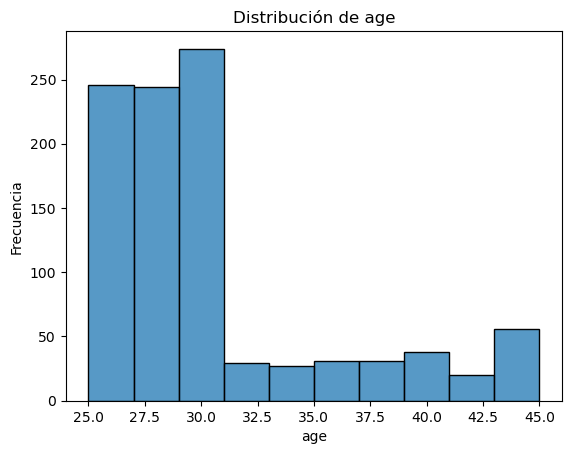

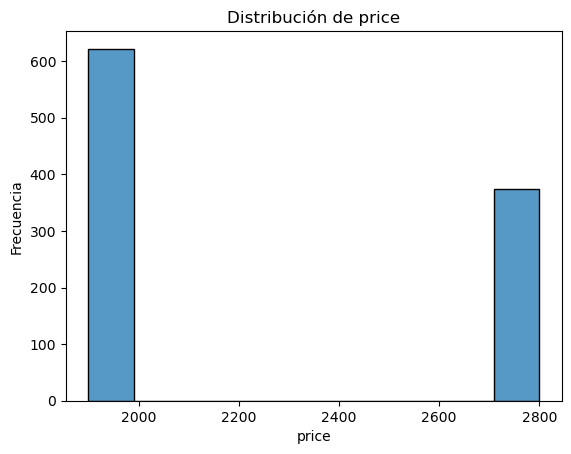

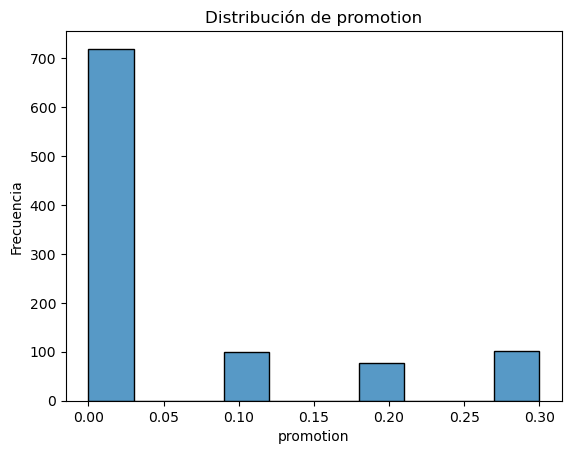

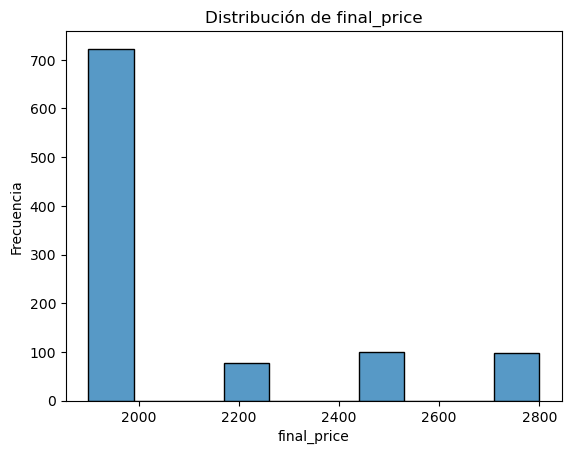

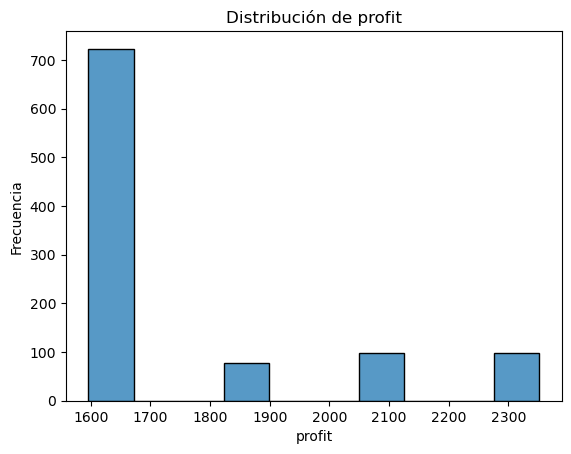

In [6]:
def plot_numeric_data(data, columns):
    for column in columns:
        sns.histplot(data[column], bins=10)
        plt.title(f'Distribución de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.show()

# Llamada a la función
numeric_columns = ['age', 'price', 'promotion', 'final_price', 'profit']
plot_numeric_data(data, numeric_columns)


In [7]:
data_num = data[['age', 'price', 'promotion', 'final_price', 'price','profit']]

In [8]:
correlations_matrix = data_num.corr()
correlations_matrix

,age,price,promotion,final_price,price,profit
age,1.000000,-0.012145,0.024445,-0.039824,-0.012145,-0.039824
price,-0.012145,1.000000,0.716452,0.766500,1.000000,0.766500
promotion,0.024445,0.716452,1.000000,0.101107,0.716452,0.101107
final_price,-0.039824,0.766500,0.101107,1.000000,0.766500,1.000000
price,-0.012145,1.000000,0.716452,0.766500,1.000000,0.766500
profit,-0.039824,0.766500,0.101107,1.000000,0.766500,1.000000


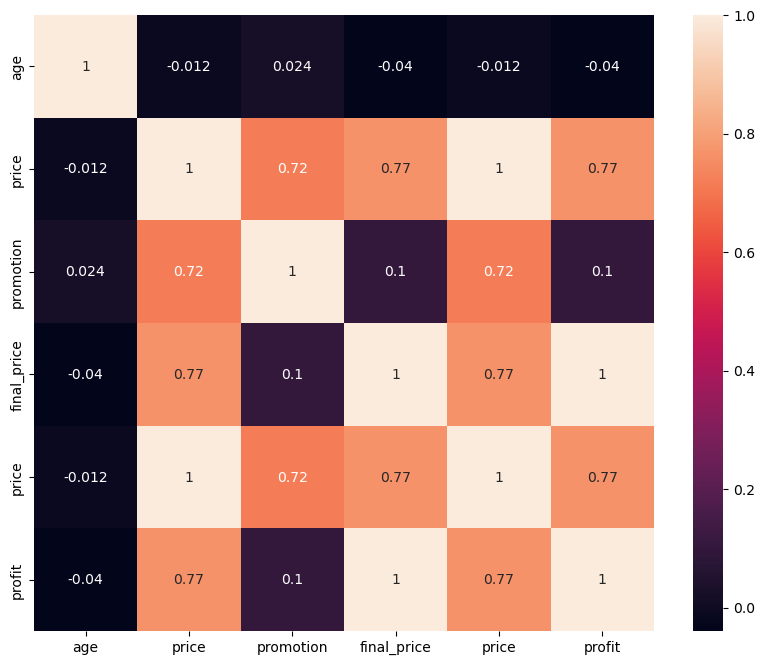

In [9]:
corr_matrix=data_num.corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

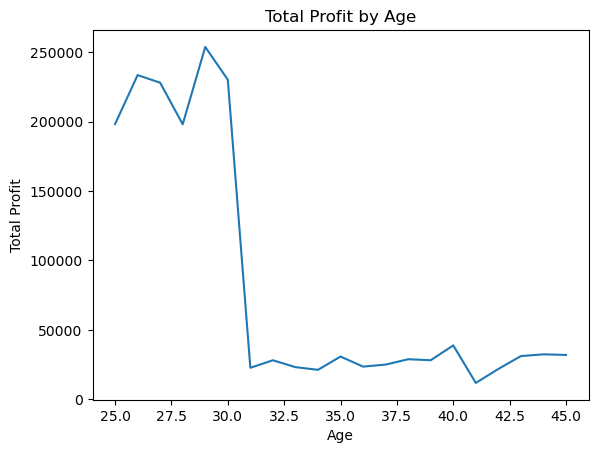

In [10]:
grouped_data = data.groupby('age').agg({'profit': 'sum'}).reset_index()

sns.lineplot(x='age', y='profit', data=grouped_data)
plt.xlabel('Age')
plt.ylabel('Total Profit')
plt.title('Total Profit by Age')
plt.show()


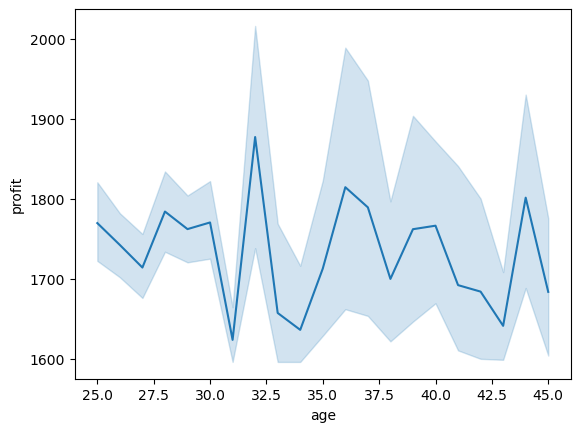

In [11]:
sns.lineplot(x='age', y='profit', data=data)
plt.show()

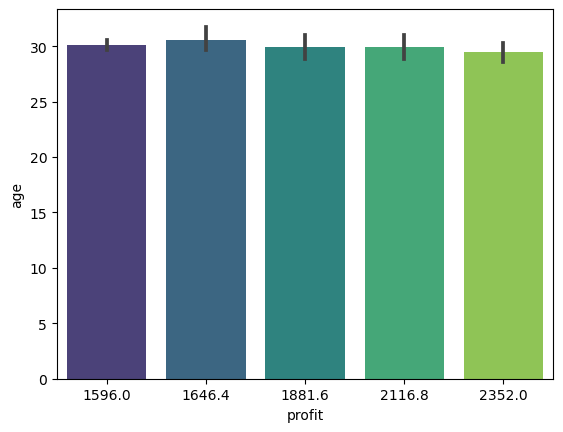

In [12]:
sns.barplot(x="profit", y="age", data=data, palette="viridis")
plt.show()

In [13]:
#Describe DataFrame - categoricals
data.describe(include=[np.object]).T

C:\Users\Andrea\AppData\Local\Temp\ipykernel_110512\2081608572.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object]).T


,count,unique,top,freq
gender,996,2,F,682
state,996,26,Monterrey,245
product,996,2,Rubí,622
sales_channel,996,8,Instagram Ads,251


In [14]:
data['state'].value_counts()

Monterrey              245
Guadalajara            204
Zacatecas              131
Veracruz                71
Aguascalientes          71
Sinaloa                 46
Ciudad de México        44
Puebla                  20
San Luis Potosí         15
Coahuila                14
Baja California Sur     14
Campeche                12
Baja California         12
Oaxaca                  11
Chihuahua               10
Guerrero                10
Chiapas                  9
Querétaro                9
Jalisco                  8
Nuevo León               7
Guanajuato               6
Yucatán                  6
Durango                  6
Nayarit                  5
Tamaulipas               5
Quintana Roo             5
Name: state, dtype: int64

In [15]:
data['sales_channel'].value_counts()

Instagram Ads    251
Facebook Ads     220
Google ads       191
Website          117
Email             96
Instagram         45
Facebook          40
Whatsapp          36
Name: sales_channel, dtype: int64

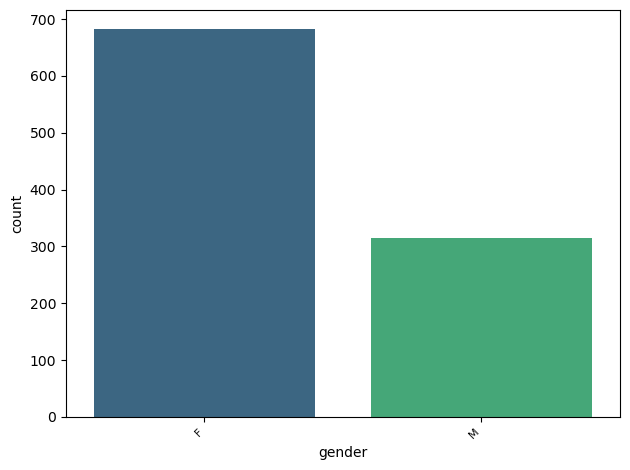

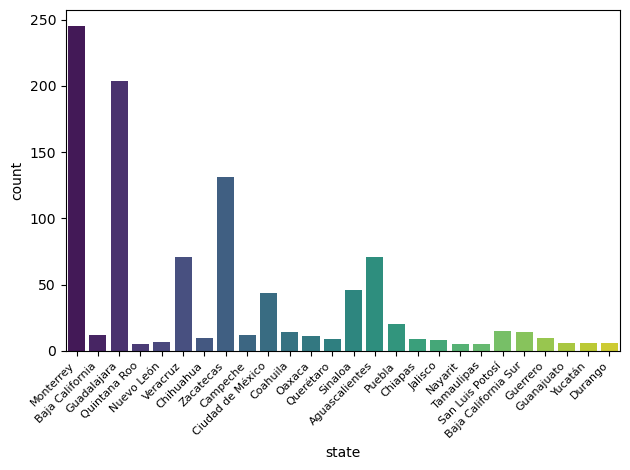

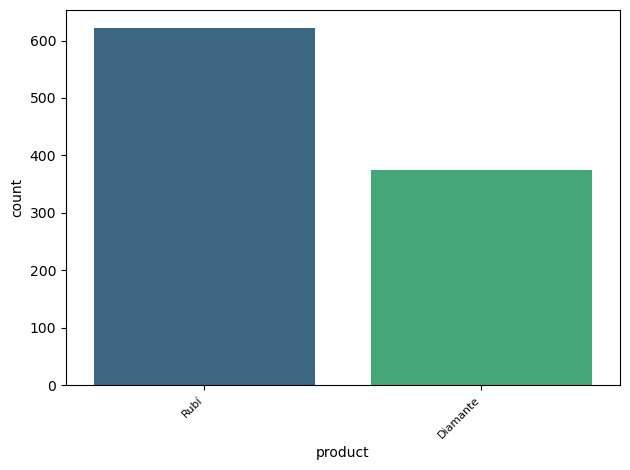

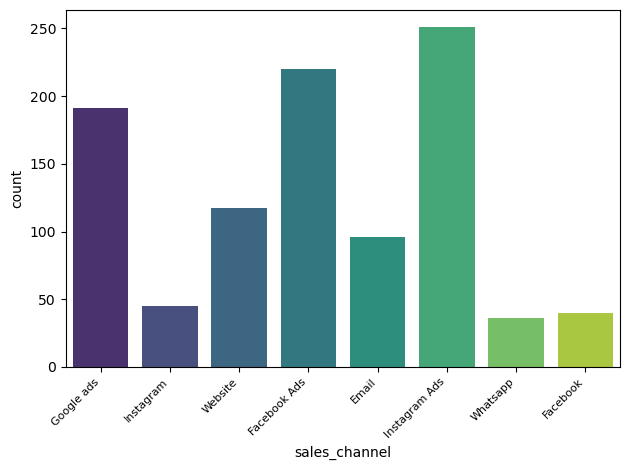

In [16]:
columns = ['gender', 'state', 'product', 'sales_channel']

def plot_countplot(column):
    sns.countplot(x=column, data=data, palette="viridis")
    plt.xticks(rotation=45, ha='right', fontsize=8)  
    plt.tight_layout()  
    plt.show()

for column in columns:
    plot_countplot(column)


In [17]:
grouped_city = data.groupby('state').agg({'profit': ['mean', 'median', 'max', 'min']})
grouped_city = grouped_city.round(2)
grouped_city

profit                        
                        mean  median     max     min
state                                               
Aguascalientes       1750.99  1596.0  2352.0  1596.0
Baja California      1691.20  1596.0  2352.0  1596.0
Baja California Sur  1690.80  1596.0  2352.0  1596.0
Campeche             1710.80  1596.0  2352.0  1596.0
Chiapas              1743.47  1596.0  2352.0  1596.0
Chihuahua            1733.76  1596.0  2352.0  1596.0
Ciudad de México     1717.04  1596.0  2352.0  1596.0
Coahuila             1813.20  1646.4  2352.0  1596.0
Durango              1596.00  1596.0  1596.0  1596.0
Guadalajara          1769.60  1596.0  2352.0  1596.0
Guanajuato           1682.80  1596.0  2116.8  1596.0
Guerrero             1851.36  1596.0  2352.0  1596.0
Jalisco              1631.70  1596.0  1881.6  1596.0
Monterrey            1759.06  1596.0  2352.0  1596.0
Nayarit              1596.00  1596.0  1596.0  1596.0
Nuevo León           1677.60  1596.0  1881.6  1596.0
Oaxaca               1854.11  1596.0  2352.0  1596.0
Puebla               1849.68  1764.0  2352.0  1596.0
Querétaro            1717.33  1596.0  2116.8  1596.0
Quintana Roo         1626.24  1646.4  1646.4  1596.0
San Luis Potosí      1615.04  1596.0  1881.6  1596.0
Sinaloa              1773.50  1596.0  2352.0  1596.0
Tamaulipas           1653.12  1596.0  1881.6  1596.0
Veracruz             1773.46  1596.0  2352.0  1596.0
Yucatán              1856.40  1621.2  2352.0  1596.0
Zacatecas            1708.21  1596.0  2352.0  1596.0

In [18]:
grouped_channel = data.groupby('sales_channel').agg({'sales_channel': 'count', 'profit': 'sum'})
grouped_channel = grouped_channel.round(2)
grouped_channel.columns = ['total_per_channel','profit']
grouped_channel

,total_per_channel,profit
sales_channel,,
Email,96,170268.0
Facebook,40,69249.6
Facebook Ads,220,386786.4
Google ads,191,331363.2
Instagram,45,77666.4
Instagram Ads,251,439656.0
Website,117,203532.0
Whatsapp,36,63067.2


In [19]:
data['profit'].value_counts().sum()

996

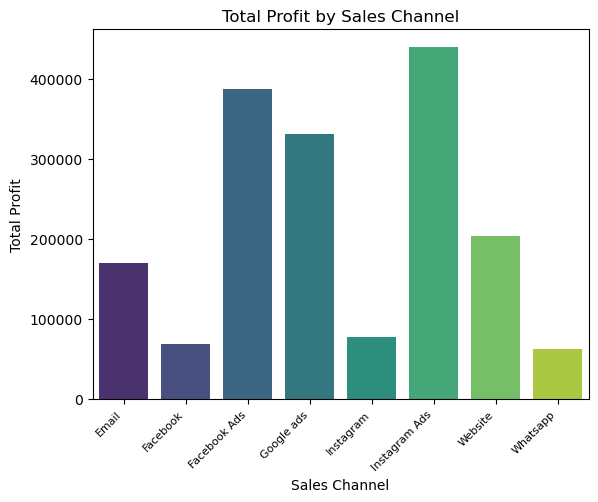

In [20]:
grouped_channel = data.groupby('sales_channel').agg({'profit': 'sum'}).reset_index()

sns.barplot(x='sales_channel', y='profit', data=grouped_channel, palette="viridis" )
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')
plt.title('Total Profit by Sales Channel')
plt.show()



In [21]:
segmented_data = data.groupby('age')['product'].value_counts().unstack().fillna(0)
segmented_data

product,Diamante,Rubí
age,,
25,45,67
26,48,86
27,36,97
28,50,61
29,59,85
30,53,77
31,3,11
32,9,6
33,3,11


In [22]:
segmented_data.max()

product
Diamante    59
Rubí        97
dtype: int64

In [23]:
count_product = data.groupby('product')['profit'].sum()
print(count_product)


product
Diamante    748876.8
Rubí        992712.0
Name: profit, dtype: float64


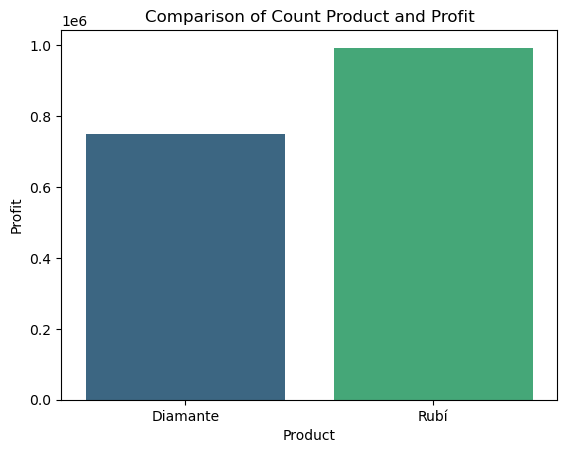

In [24]:
profit_sum = data.groupby('product')['profit'].sum().reset_index()

sns.barplot(x="product", y="profit", data=profit_sum, palette="viridis")
plt.xlabel("Product")
plt.ylabel("Profit")
plt.title("Comparison of Count Product and Profit")
plt.show()


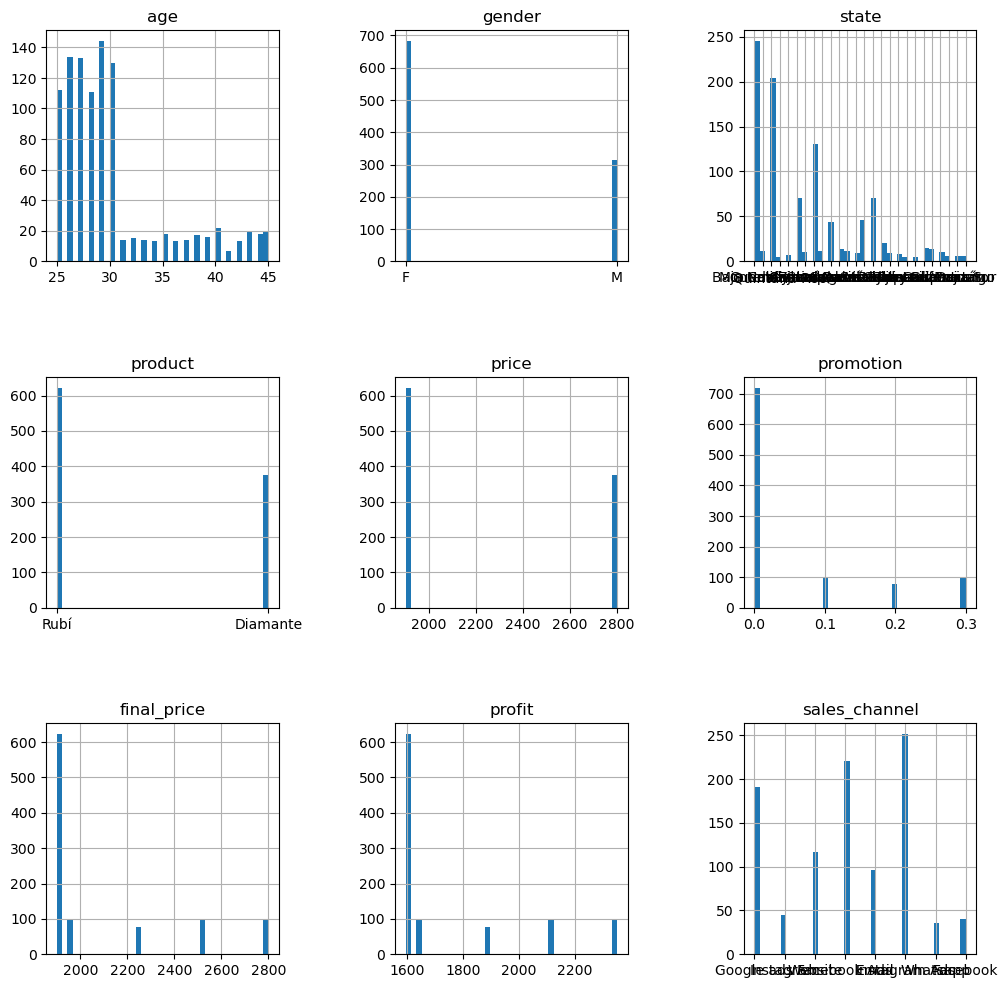

In [25]:
data1 = data.drop(['pd_day', 'pd_year', 'pd_month'], axis=1)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, column in enumerate(data1.columns):
    ax = axes[i // 3, i % 3]
    data[column].hist(ax=ax, bins=40)
    ax.set_title(column)

plt.show()


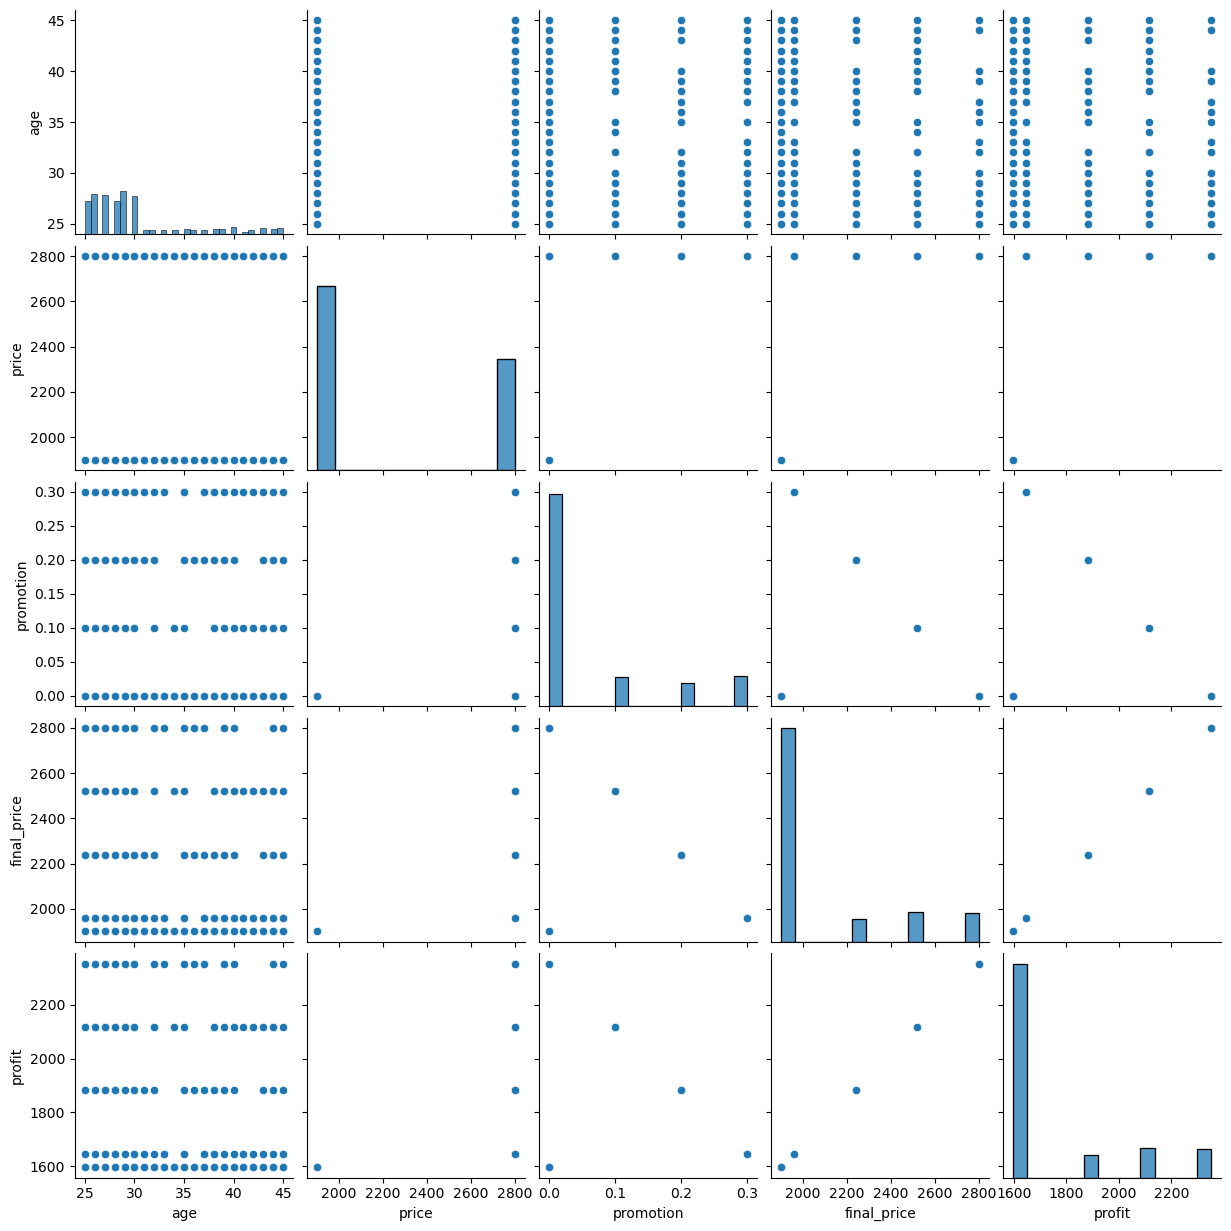

In [26]:
data=data.drop(['pd_day','pd_year','pd_month'], axis=1)
sns.pairplot(data)